# EXERCISE 16: Ensemble Learning (Bagging)

Download heart disease dataset heart.csv in Exercise folder and do following, (credits of dataset: https://www.kaggle.com/fedesoriano/heart-failure-prediction)

1. Load heart disease dataset in pandas dataframe
2. Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
3. Convert text columns to numbers using label encoding and one hot encoding
4. Apply scaling
5. Build a classification model using support vector machine. Use standalone model as well as Bagging model and check if you see any difference in the performance.
6. Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance
7. Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why. Use internet to figure out in what conditions bagging works the best.

### Following things i want to do:
1. Import all important libraries and modules
2. Load the dataset
3. Do some Data Cleaning (NA values, Outliers, etc)
4. Do Exploratory Data Analysis (EDA)
5. Perform Data Preprocessing (OneHotEncoding, Scaling)
6. Training, Validating and Testing Dataset splitting
7. Standalone Model Training on Train dataset and evaluating (SVM)
8. Using Bagging for SVM
9. Standalone Model Training and evaluating (DecisionTreeClassifier)
10. Using Bagging for DecisionTreeClassifier
11. Determining where it makes more sense to use Bagging (figuring out which model has High variance or bias)
12. Hyperparameter tuning on Validation dataset using Stratified KFold Cross Validation and GridSearhCV to find the best Model
13. Finalizing a Model or BaggingClassifier with its best parameters
14. Training the Final Model and using it for Prediction 
15. Checking score and plotting confusion matrix
16. Dimensionality Reduction using Principal Component Analysis (PCA)

Then Conslusions.

## 1. Import all important libraries and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

## 2. Load heart disease dataset in pandas dataframe

In [2]:
df = pd.read_csv("C:\\Users\\User\\OneDrive\\Documents\\Faiz Khan Program\\Machine Learning\\ML with codebasics\\heart_disease.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [8]:
410/508

0.8070866141732284

As seen above, the Target Class are not stable

## 3. Do some Data Cleaning (NA values, Outliers, etc)

### NA Values

In [9]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Using the 3 Sigma rule to detect Outliers and remove them

    mean + 3 * standard deviation

In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The other columns seems normal but the **Cholesterol** and **Oldpeak** column seems like it might have some outliers since the mean of **Cholesterol** is 198 but max is 603 which is pretty high and far away from the mean, same with **Oldpeak**

In [11]:
print(df['Cholesterol'].mean() + 3 * df['Cholesterol'].std())
print(df['Oldpeak'].mean() + 3 * df['Oldpeak'].std())

526.9519979267629
4.087074287570635


In [12]:
outliers1 = df[ df['Cholesterol'] > ( df['Cholesterol'].mean() + 3 * df['Cholesterol'].std() )]
outliers2 = df[ df['Oldpeak'] > ( df['Oldpeak'].mean() + 3 * df['Oldpeak'].std() )]
outliers2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [13]:
df.drop(outliers1.index, axis=0, inplace=True)
df.drop(outliers2.index, axis=0, inplace=True)

In [14]:
df.shape

(909, 12)

In [15]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,53.503850,132.348735,197.254125,0.234323,136.823982,0.860726,0.551155
std,9.433353,18.490754,107.699995,0.423808,25.548215,1.017235,0.497650
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,266.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,518.000000,1.000000,202.000000,4.000000,1.000000


## 4. Do Exploratory Data Analysis (EDA)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

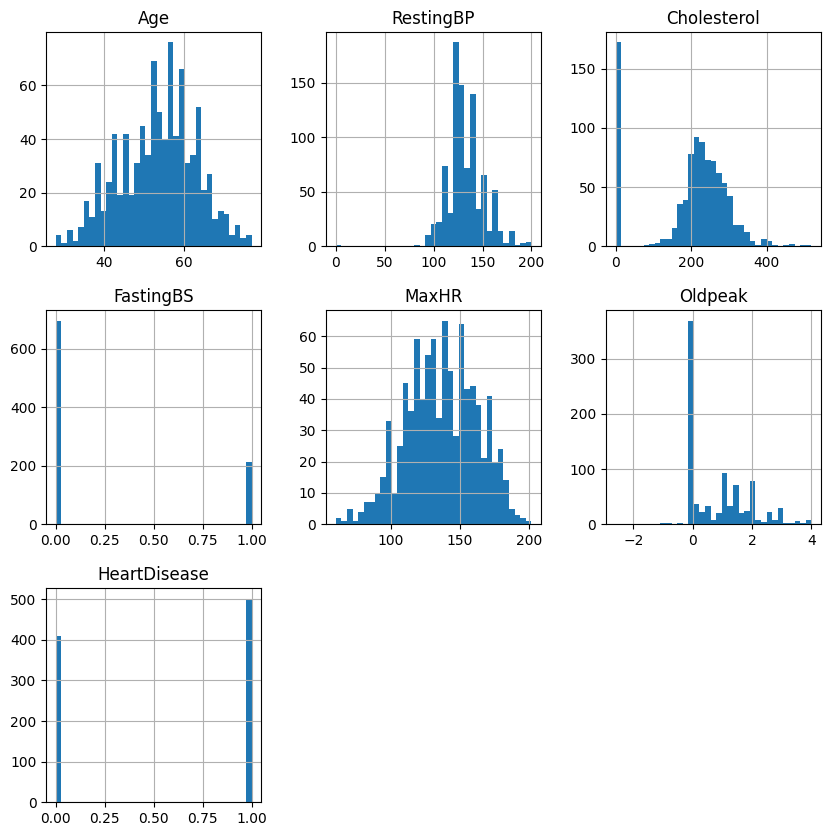

In [16]:
df.hist(bins=35, figsize=(10,10))

From above we can see that

1. Age, RestingBP, Cholesterol and MaxHR kind of have a Normal (Gaussian) Distribition
2. Due to most of the columns having Normal Distribution especially the Cholesterol column, it is a good idea that we have used The 3 Sigma rule for Outliers detection instead of IRQ rule

<Axes: xlabel='Sex'>

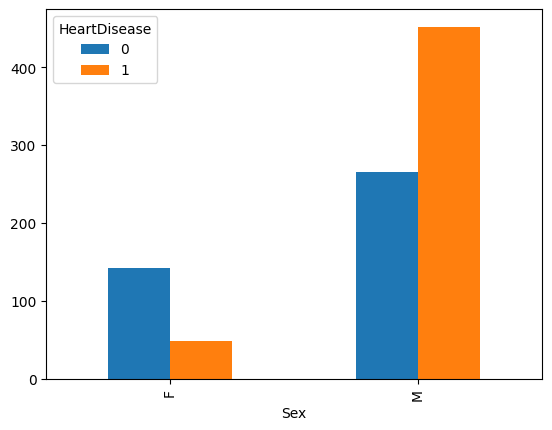

In [17]:
pd.crosstab(df['Sex'], df['HeartDisease']).plot(kind="bar")

<Axes: xlabel='ChestPainType'>

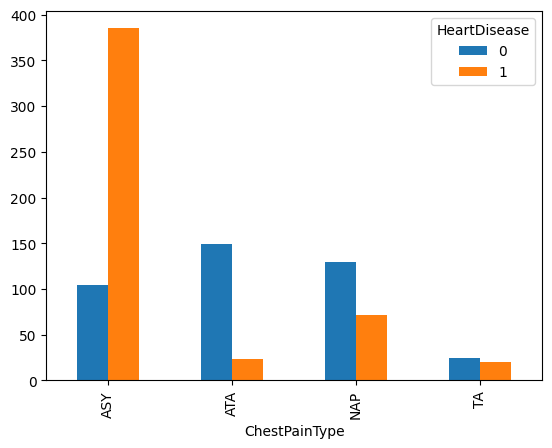

In [18]:
pd.crosstab(df['ChestPainType'], df['HeartDisease']).plot(kind="bar")

<Axes: xlabel='FastingBS'>

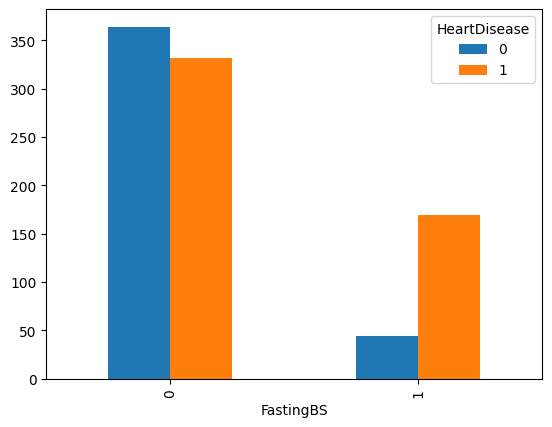

In [19]:
pd.crosstab(df['FastingBS'], df['HeartDisease']).plot(kind="bar")

<Axes: xlabel='RestingECG'>

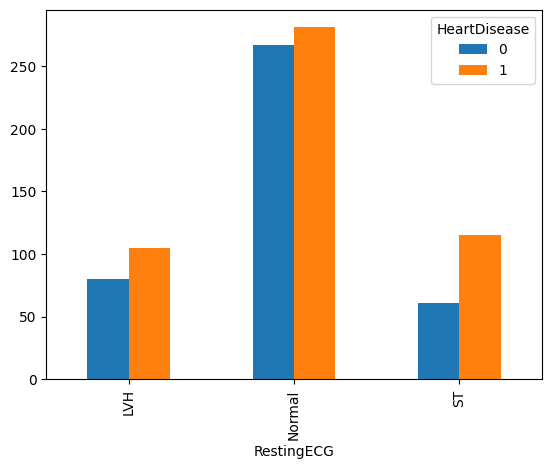

In [20]:
pd.crosstab(df['RestingECG'], df['HeartDisease']).plot(kind="bar")

<Axes: xlabel='ExerciseAngina'>

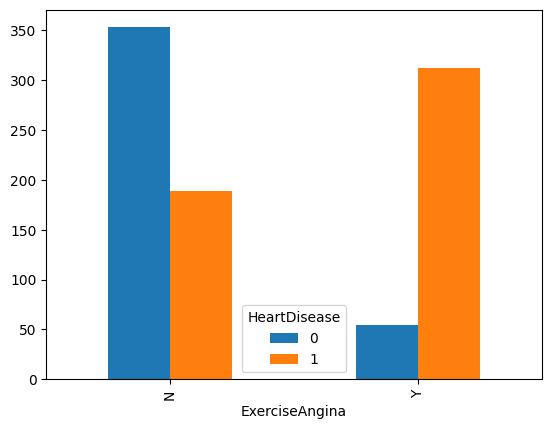

In [21]:
pd.crosstab(df['ExerciseAngina'], df['HeartDisease']).plot(kind="bar")

<Axes: xlabel='ST_Slope'>

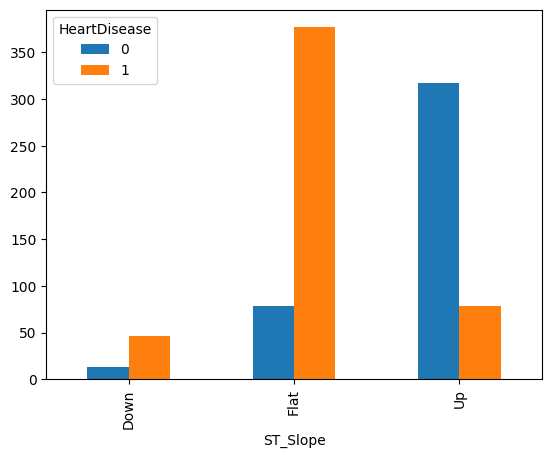

In [22]:
pd.crosstab(df['ST_Slope'], df['HeartDisease']).plot(kind="bar")

From above we can see that

1. The 'Sex' column plays a major role, as it shows that males have a higher incidence of heart disease compared to females.
2. In the 'ChestPainType' column, heart disease is significantly higher in individuals with the ASY type.
3. Having a FastingBS of 0 leads to high chances of heart disease; however, many individuals without heart disease also have a FastingBS of 0. Therefore, this feature might not be particularly important.
4. Patients with normal RestingECG results have a high chance of heart disease, but there are also many without heart disease. Thus, this feature may not be very significant.
5. Patients with no ExerciseAngina are less likely to develop heart disease compared to those who do have ExerciseAngina.
6. Patients with a flat ST_Slope have a much higher chance of developing heart disease and Patients with an upward ST_Slope have a much lower chance of developing heart disease.

## 5. Perform Data Preprocessing (OneHotEncoding, Scaling)

These are all the Categorical columns we have

In [23]:
df.select_dtypes(include=['object']).columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [24]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [25]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [26]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [27]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [28]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

1. Sex, ChestPainType are Nominal Variables (OneHotEncoding or Pandas Dummy variables)
2. RestingECG, ExerciseAngina, ST_Slope are Ordinal Variables (Ordinal Encoding)

### OneHotEncoding and OrdinalEncoding using ColumnTransformer and Pipeline

In [29]:
from sklearn.preprocessing import OrdinalEncoder
preprocessing = ColumnTransformer(transformers=[
    ("nominal_var", Pipeline(steps=[
        ("nominal", OneHotEncoder(sparse_output=False, drop="first")),
    ]), ['Sex', 'ChestPainType']),
    
    ("ordinal_var", Pipeline(steps=[
        ("ordinal", OrdinalEncoder()),
    ]), ['RestingECG', 'ExerciseAngina', 'ST_Slope'])
])

Fit and Transforming the data then making it into a DataFrame and giving the column names

In [30]:
# Fit and transform the data
transformed_data = preprocessing.fit_transform(df)

# Get feature names after transformation
nominal_features = preprocessing.named_transformers_['nominal_var'].get_feature_names_out([
    'Sex', 'ChestPainType']).tolist()
ordinal_features = ['RestingECG_encoded', 'ExerciseAngina_encoded', 'ST_Slope_encoded']

all_features = nominal_features + ordinal_features
encoded_df = pd.DataFrame(transformed_data, columns=all_features)

Resetting original "df" dataframe and the "encoded_df" before concatenating them together

In [31]:
df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
newdf = pd.concat([df, encoded_df.astype(int)], axis=1)

Dropping unncessary columns now

In [32]:
newdf.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1,inplace=True)

In [33]:
newdf

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_encoded,ExerciseAngina_encoded,ST_Slope_encoded
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,2
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,1
2,37,130,283,0,98,0.0,0,1,1,0,0,2,0,2
3,48,138,214,0,108,1.5,1,0,0,0,0,1,1,1
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,45,110,264,0,132,1.2,1,1,0,0,1,1,0,1
905,68,144,193,1,141,3.4,1,1,0,0,0,1,0,1
906,57,130,131,0,115,1.2,1,1,0,0,0,1,1,1
907,57,130,236,0,174,0.0,1,0,1,0,0,0,0,1


### Scaling using StandardScaler in a ColumnTransformer

Scaling only Original Numeric columns, not those Categorical columns which we have OneHotEncoded or did OrdinalEncoding on.

you typically apply scaling only to numerical columns in your dataset, not to categorical or encoded columns.

Categorical data, including one-hot encoded data or other forms of categorical encoding (like label encoding), typically do not undergo scaling

**One-Hot Encoding:** After one-hot encoding, categorical variables are transformed into binary columns (0s and 1s) representing the presence or absence of a category. These columns are already on the same scale (binary), and scaling them further doesn’t provide meaningful normalization because their interpretation is categorical rather than numerical.

**Label Encoding:** If you use label encoding (where categories are converted into numerical values), the resulting numerical values are usually categorical codes rather than quantitative measures. Scaling these would distort their categorical meaning.

In [34]:
preprocessing = ColumnTransformer(transformers=[
    ("scaling", StandardScaler(), ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])
])
scaled_data = preprocessing.fit_transform(newdf)

In [35]:
newdf['Age'] = scaled_data[:,0]
newdf['RestingBP'] = scaled_data[:,1]
newdf['Cholesterol'] = scaled_data[:,2]
newdf['MaxHR'] = scaled_data[:,3]
newdf['Oldpeak'] = scaled_data[:,4]
newdf

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_encoded,ExerciseAngina_encoded,ST_Slope_encoded
0,-1.432289,0.414016,0.852334,0,1.377606,-0.846609,0,1,1,0,0,1,0,2
1,-0.477702,1.496234,-0.160294,0,0.750995,0.136990,1,0,0,1,0,1,0,1
2,-1.750484,-0.127092,0.796593,0,-1.520472,-0.846609,0,1,1,0,0,2,0,2
3,-0.583767,0.305795,0.155572,0,-1.128840,0.628789,1,0,0,0,0,1,1,1
4,0.052624,0.955125,-0.020941,0,-0.580555,-0.846609,0,1,0,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,-0.901963,-1.209309,0.620080,0,-0.188923,0.333709,1,1,0,0,1,1,0,1
905,1.537537,0.630460,-0.039522,1,0.163546,2.497626,1,1,0,0,0,1,0,1
906,0.370820,-0.127092,-0.615512,0,-0.854698,0.333709,1,1,0,0,0,1,1,1
907,0.370820,-0.127092,0.359955,0,1.455933,-0.846609,1,0,1,0,0,0,0,1


## 6. Training, Validating and Testing Dataset splitting

In [36]:
X = newdf.drop(['HeartDisease'], axis=1)
y = newdf['HeartDisease']

In [37]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [38]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [39]:
len(X_train)

636

In [40]:
len(X_val)

136

In [41]:
len(X_test)

137

## 7. Standalone Model Training on Train dataset and evaluating (SVM)

In [42]:
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

SVC()

In [43]:
svm.score(X_val, y_val)

0.8676470588235294

## 8. Using Bagging for SVM

In [44]:
bag_svm = BaggingClassifier(estimator=SVC(),
                           n_estimators=100,
                           max_samples=0.8,
                           oob_score=True,
                           random_state=0)
bag_svm.fit(X_train, y_train)

BaggingClassifier(estimator=SVC(), max_samples=0.8, n_estimators=100,
                  oob_score=True, random_state=0)

In [45]:
bag_svm.score(X_val, y_val)

0.8676470588235294

In [46]:
bag_svm.oob_score_

0.8569182389937107

## 9. Standalone Model Training and evaluating (DecisionTreeClassifier)

In [47]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
dt.score(X_val, y_val)

0.8455882352941176

## 10. Using Bagging for DecisionTreeClassifier

In [49]:
bag_dt = BaggingClassifier(estimator=DecisionTreeClassifier(),
                          n_estimators=100,
                          max_samples=0.8,
                          oob_score=True,
                          random_state=0)
bag_dt.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [50]:
bag_dt.score(X_val, y_val)

0.875

In [51]:
bag_dt.oob_score_

0.839622641509434

## 11. Determining where it makes more sense to use Bagging (figuring out which model has High variance or bias)

#### where it makes most sense to use bagging and why? 

**High Variance Models:** Bagging is particularly effective with models that have high variance, such as decision trees. High variance models are prone to overfitting the training data. By training multiple models on different subsets of the data, bagging reduces the likelihood of overfitting and thus improves generalization to unseen data.

**Unstable Models:** Models that are highly sensitive to small changes in the training data benefit significantly from bagging. Decision trees, again, are a prime example. 

#### Variance and Bias  
**Accuracy vs. Error**
1. Accuracy measures the proportion of correct predictions and ranges from 0 to 1, with 1 being perfect accuracy.
2. Error (often measured by the complement of accuracy, e.g., **error rate = 1 - accuracy**) also ranges from 0 to 1.

**High Bias (Underfitting):**
1. Poor performance on both the training set and the validation set.
2. Meaning model is too simple to capture the underlying patterns in the data.
3. Both training error and validation error are high, and the errors are relatively close to each other
4. Both training and validation accuracy are low (significantly below what would be considered acceptable for the specific task).
5. The gap between them is small.
6. Example: Training Accuracy = 0.60, Validation Accuracy = 0.58.


**High Variance (Overfitting):**
1. Good performance on the training set but poor performance on the validation set.
2. Meaning model is too complex and is capturing noise or specific patterns in the training data that do not generalize to the validation data.
3. If the training error is low and the validation error is high, the model is likely overfitting. 
4. Training accuracy is high, but validation accuracy is much lower.
5. The gap between them is large.
6. Example: Training Accuracy = 0.95, Validation Accuracy = 0.75.

**Low Bias and Low Variance (Well-Fitting):**
1. Both training and validation accuracy are high.
2. Both training and validation errors are low.
3. The gap between them is small.
4. Example: Training Accuracy = 0.88, Validation Accuracy = 0.87.

**Interpretation of the Gap:**
1. Gap = Train acc - Val acc
2. Small Gap (e.g., < 0.05 or 5%): Indicates good generalization, suggesting the model performs similarly on both training and validation sets.
3. Large Gap (e.g., > 0.1 or 10%): Indicates potential overfitting, suggesting the model performs well on the training set but not on the validation set.

Keeping all those in mind, lets determine if our model is Overfitting or Underfitting

### FOR SVM

In [52]:
# Predictions
y_train_pred = svm.predict(X_train)
y_val_pred = svm.predict(X_val)

# Evaluate performance
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")

# High bias and high variance analysis
train_error = 1 - train_accuracy
val_error = 1 - val_accuracy

error_gap = abs(train_error - val_error)

if train_error > 0.15 and val_error > 0.15:
    print("The model has high bias (underfitting).")
elif error_gap > 0.1:
    print("The model has high variance (overfitting).")
else:
    print("The model has a good fit.")

Training Accuracy: 0.8852201257861635
Validation Accuracy: 0.8676470588235294
The model has a good fit.


In [53]:
error_gap

0.017573066962634054

### FOR DECISION TREE

In [54]:
y_train_pred = dt.predict(X_train)
y_val_pred = dt.predict(X_val)

# Evaluate performance
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

train_error = 1-train_accuracy
val_error = 1-val_accuracy

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
error_gap = abs(train_error - val_error)
if train_error > 0.15 and val_error > 0.15:
    print("The model has high bias (underfitting).")
elif error_gap > 0.1:
    print("The model has high variance (overfitting).")
else:
    print("The model has a good fit.")

Training Accuracy: 1.0
Validation Accuracy: 0.8455882352941176
The model has high variance (overfitting).


As seen above, we can say that **DecisionTreeClassifier** have high variance meaning it would make sense to use Bagging here.

Thats it, we are done till here for the Exercise.

But lets go further and Finilize a model, in this case SVM and Hyperparameter tune it.

## 12. Hyperparameter tuning on Validation dataset using Stratified KFold Cross Validation and GridSearhCV to find the best Model

In [55]:
model_params = {
    "svm": {
        "model": SVC(),
        "params": {
            "C" : [1, 10, 20, 30, 50, 100],
            "kernel" : ["rbf", "poly", "linear"],
            "gamma" : ["auto", "scale"]
        }
    },
    
    "decision_tree" : {
        "model" : DecisionTreeClassifier(),
        "params" : {
            "criterion" : ['gini', 'entropy']
        }
    },
    
     
    "bagging_svc": {
        "model": BaggingClassifier(estimator=SVC()),
        "params": {
            "n_estimators": [5, 10, 20, 50, 100, 150, 200, 270],
            "max_samples": [0.7, 0.8, 0.9],
#             "oob_score": [True],
            "estimator__C": [1, 10, 20],  # Example parameter for base estimator
            "estimator__kernel": ["rbf", "linear"]  # Example parameter for base estimator
        }
    },
    
    "bagging_decision_tree": {
        "model": BaggingClassifier(estimator=DecisionTreeClassifier()),
        "params": {
            "n_estimators": [5, 10, 20, 50, 100, 150, 200, 270],
            "max_samples": [0.7, 0.8, 0.9],
#             "oob_score": [True],
            "estimator__criterion": ['gini', 'entropy']  # Example parameter for base estimator
        }
    }
}

In [56]:
scores = []
kfold = StratifiedKFold(n_splits=5)
for model, modelparams in model_params.items():
    grid = GridSearchCV(modelparams['model'], modelparams['params'],
                        cv=kfold, return_train_score=False)
    grid.fit(X_train, y_train)
    
    scores.append({
        "model" : model,
        "best_estimator" : grid.best_estimator_,
        "best_score" : grid.best_score_,
        "best_params" : grid.best_params_
    })

resultdf = pd.DataFrame(scores, columns=["model", "best_estimator", "best_score", "best_params"])

In [57]:
resultdf

,model,best_estimator,best_score,best_params
0,svm,SVC(C=1),0.855401,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}"
1,decision_tree,DecisionTreeClassifier(criterion='entropy'),0.794058,{'criterion': 'entropy'}
2,bagging_svc,"(SVC(C=1, kernel='linear', random_state=800838...",0.856939,"{'estimator__C': 1, 'estimator__kernel': 'line..."
3,bagging_decision_tree,"(DecisionTreeClassifier(criterion='entropy', r...",0.860076,"{'estimator__criterion': 'entropy', 'max_sampl..."


In [68]:
grid.best_estimator_

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy'),
                  max_samples=0.8, n_estimators=270)

In [67]:
grid.best_params_

{'estimator__criterion': 'entropy', 'max_samples': 0.8, 'n_estimators': 270}

In [69]:
grid.best_score_

0.860076279527559

As we can see, using **GridSearchCV** we can conclude that **Bagging** with **DecisionTreeClassifier** performed the best and it also made sense using **Bagging** in **DecisionTreeClassifier** because we've seen above that it had **High Variance**

## 13. Finalizing a Model or BaggingClassifier with the best parameters

We will finilize **Bagging** with **DecisionTreeClassifier** with the best parameters and use it for prediction since it performed the best

In [72]:
finalized_model = BaggingClassifier(estimator=DecisionTreeClassifier(criterion="entropy"),
                                   n_estimators=270,
                                   max_samples=0.8,
                                   oob_score=True,
                                   random_state=0)

## 14. Training the Final Model and using it for Prediction

In [73]:
finalized_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy'),
                  max_samples=0.8, n_estimators=270, oob_score=True,
                  random_state=0)

In [85]:
finalized_model.score(X_val, y_val)

0.8823529411764706

In [75]:
finalized_model.oob_score_

0.8522012578616353

We can see that, our Finalized Model scored around 85% - 88% accuracies on our **Validation Dataset**, which is pretty decent and high!

Now, lets do prediction on our **Testing Dataset**

In [78]:
predict = finalized_model.predict(X_test)
predict

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1], dtype=int64)

In [91]:
from sklearn.metrics import log_loss
log_loss(y_test, predict)

3.9463854075675715

## 15. Checking score and plotting confusion matrix

In [83]:
len(X_test)

137

Text(95.72222222222221, 0.5, 'Truth')

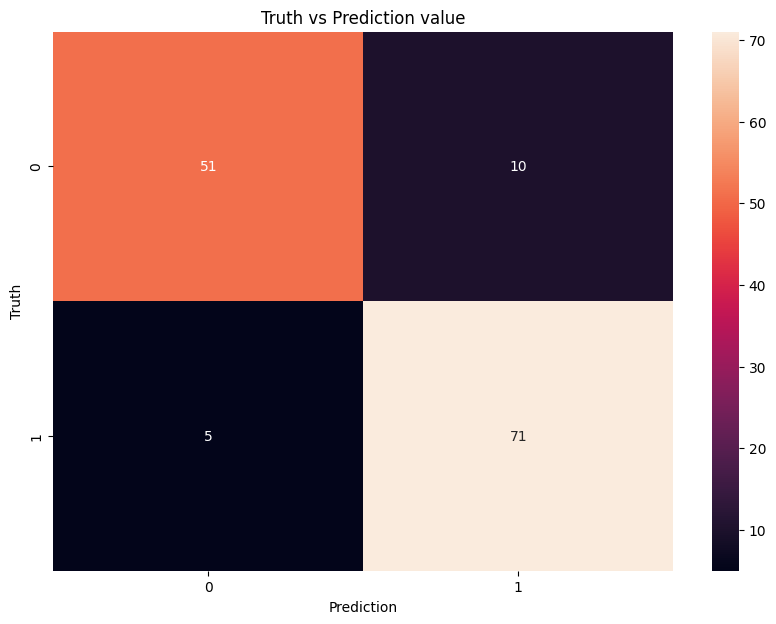

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.title("Truth vs Prediction value")
plt.xlabel("Prediction")
plt.ylabel("Truth")

In [82]:
np.sum(y_test != predict)

15

We can see our model performed really well since out of 137 samples we got only 15 wrong

## 16. Trying Dimensionality Reduction

Well we already got our best model with best accuracy, now lets try reducing the Dimension using **PCA** just for fun, ofcourse it doesn't make sense to do it here and will reduce the accuracy but lets just do it to check because why not 🤷‍♂😂

In [97]:
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
print(pca.n_components_)
print(pca.explained_variance_ratio_)

10
[0.32115382 0.17143554 0.13335223 0.10715455 0.08326093 0.04549975
 0.032382   0.03069933 0.02358633 0.02247195]


In [98]:
finalized_model.fit(X_train_pca, y_train)
finalized_model.score(X_test_pca, y_test)

0.656934306569343

Welp, Using **PCA** was not a good idea as we can see only 65%.

# So in conlusion:

Using Bagging in DecisionTreeClassfier made the most sense since DecisionTreeClassfier are known as weak learner and have high variance problem and combining multiple DecisionTreeClassfier in a Bagging can be pretty useful as we can see above we got 85% to 88% accuracies